In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
B=pd.read_excel("data.xlsx",sheet_name=0)
B

,I,mulB,B1,B2,B
0,0.00,0.001,12.9,12.9,0.0129
1,0.11,0.001,90.0,84.0,0.0870
2,0.20,0.001,153.0,156.0,0.1545
3,0.30,0.001,241.0,233.0,0.2370
4,0.40,0.001,305.0,309.0,0.3070
5,0.50,0.001,383.0,384.0,0.3835
6,0.60,0.001,455.0,459.0,0.4570
7,0.70,0.001,530.0,528.0,0.5290
8,0.80,0.001,589.0,594.0,0.5915
9,0.90,0.001,660.0,655.0,0.6575


In [9]:
d=pd.read_excel("data.xlsx",sheet_name=1)
d

,mulI,I,I_M,U_43
0,0.001,16,0.0,0.020
1,0.001,16,0.1,0.138
2,0.001,16,0.2,0.290
3,0.001,16,0.3,0.470
4,0.001,16,0.4,0.620
...,...,...,...,...
83,0.001,80,0.6,5.423
84,0.001,80,0.7,6.266
85,0.001,80,0.8,7.088
86,0.001,80,0.9,7.836


In [10]:
d2=pd.read_excel("data.xlsx",sheet_name=2)
d2

,Imul,I,Im,U_43,Im.1,U_34,U_p
0,0.001,100,0.0,0.056,0.0,0.450,0.2530
1,0.001,100,0.1,1.010,-0.1,1.590,1.3000
2,0.001,100,0.2,2.237,-0.2,2.750,2.4935
3,0.001,100,0.3,3.390,-0.3,3.905,3.6475
4,0.001,100,0.4,4.622,-0.4,5.125,4.8735
5,0.001,100,0.5,5.753,-0.5,6.229,5.9910
6,0.001,100,0.6,6.852,-0.6,7.333,7.0925
7,0.001,100,0.7,7.886,-0.7,8.363,8.1245
8,0.001,100,0.8,8.854,-0.8,9.370,9.1120
9,0.001,100,0.9,9.774,-0.9,10.310,10.0420


In [11]:
d3=pd.read_excel("data.xlsx",sheet_name=3)
d3

,U_35,a,l,L_35
0,"81,24mV",2mm,8mm,15mm


In [12]:
dd=d.merge(B,left_on="I_M",right_on="I")
dd

,mulI,I_x,I_M,U_43,I_y,mulB,B1,B2,B
0,0.001,16,0.0,0.020,0.0,0.001,12.9,12.9,0.0129
1,0.001,16,0.2,0.290,0.2,0.001,153.0,156.0,0.1545
2,0.001,16,0.3,0.470,0.3,0.001,241.0,233.0,0.2370
3,0.001,16,0.4,0.620,0.4,0.001,305.0,309.0,0.3070
4,0.001,16,0.5,0.793,0.5,0.001,383.0,384.0,0.3835
...,...,...,...,...,...,...,...,...,...
75,0.001,80,0.6,5.423,0.6,0.001,455.0,459.0,0.4570
76,0.001,80,0.7,6.266,0.7,0.001,530.0,528.0,0.5290
77,0.001,80,0.8,7.088,0.8,0.001,589.0,594.0,0.5915
78,0.001,80,0.9,7.836,0.9,0.001,660.0,655.0,0.6575


In [13]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return np.array([k,b,np.abs(sigk/k),np.abs(sigb/b)])

In [73]:
import math

def print_latex_csv(*values):
    def to_latex_scientific(x):
        if x == 0:
            return "0.00"
        exponent = math.floor(math.log10(abs(x)))
        mantissa = x / (10 ** exponent)
        return f"{mantissa:.2f} \\dot 10^{{{exponent}}}"
    latex_values = [to_latex_scientific(v) for v in values]
    csv_line = ",".join(f'${lv}$' for lv in latex_values)
    print(csv_line)

$1.60 \dot 10^{1}$,$2.11 \dot 10^{-3}$,$-2.27 \dot 10^{-5}$,$5.40 \dot 10^{-3}$,$1.08 \dot 10^{-1}$
$2.00 \dot 10^{1}$,$3.02 \dot 10^{-3}$,$-2.91 \dot 10^{-5}$,$4.26 \dot 10^{-3}$,$9.54 \dot 10^{-2}$
$3.00 \dot 10^{1}$,$4.53 \dot 10^{-3}$,$-4.30 \dot 10^{-5}$,$6.11 \dot 10^{-3}$,$1.39 \dot 10^{-1}$
$4.00 \dot 10^{1}$,$6.12 \dot 10^{-3}$,$-5.69 \dot 10^{-5}$,$2.18 \dot 10^{-3}$,$5.07 \dot 10^{-2}$
$5.00 \dot 10^{1}$,$7.62 \dot 10^{-3}$,$-7.73 \dot 10^{-5}$,$5.07 \dot 10^{-3}$,$1.08 \dot 10^{-1}$
$6.00 \dot 10^{1}$,$9.13 \dot 10^{-3}$,$-9.66 \dot 10^{-5}$,$3.38 \dot 10^{-3}$,$6.89 \dot 10^{-2}$
$7.00 \dot 10^{1}$,$1.06 \dot 10^{-2}$,$-7.98 \dot 10^{-5}$,$5.10 \dot 10^{-3}$,$1.46 \dot 10^{-1}$
$8.00 \dot 10^{1}$,$1.21 \dot 10^{-2}$,$-1.18 \dot 10^{-4}$,$3.21 \dot 10^{-3}$,$7.11 \dot 10^{-2}$


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


array([0.00211273, 0.00302334, 0.00453312, 0.00611883, 0.00762054,
       0.0091252 , 0.010597  , 0.01211649])

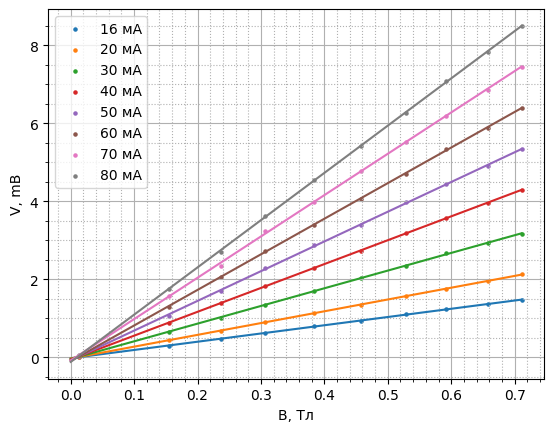

In [74]:
k=[]
for i in sorted(list(set(dd.I_x))):
    kt,b,sk,sb=getkb(dd[dd.I_x==i].B,dd[dd.I_x==i].U_43/1000)
    print_latex_csv(i,kt,b,sk,sb)
    plt.scatter(dd[dd.I_x==i].B,dd[dd.I_x==i].U_43,s=5,label=f"{i} мА")
    l=np.linspace(0,np.max(dd[dd.I_x==i].B),100)
    plt.plot(l,(l*kt+b)*1000)
    k.append(kt)
plt.xlabel("B, Тл")
plt.ylabel("V, mВ")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend()
plt.savefig("ks.eps")
k=np.array(k)
k

In [53]:
I=np.array(sorted(list(set(dd.I_x))))/1000
I

array([0.016, 0.02 , 0.03 , 0.04 , 0.05 , 0.06 , 0.07 , 0.08 ])

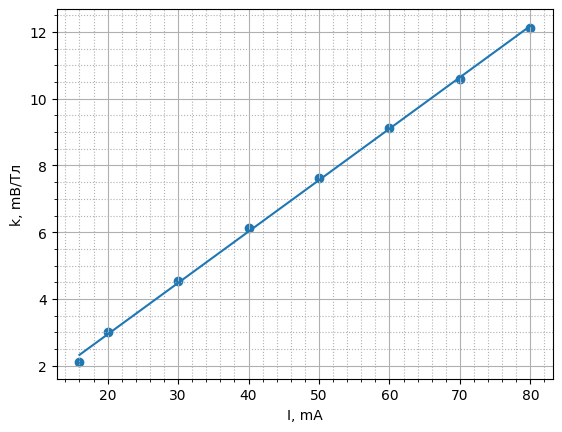

In [56]:
kt,b,sk,sb=getkb(I,k)
plt.plot(I*1000,(I*kt+b)*1000)
plt.scatter(I*1000,k*1000)
plt.ylabel("k, mВ/Тл")
plt.xlabel("I, mA")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.savefig("kI.eps")

In [76]:
kt,b,sk,sb

(np.float64(0.012116492405790786),
 np.float64(-0.0001180534162559992),
 np.float64(0.003211435235474838),
 np.float64(0.07107839327018875))

In [57]:
R=kt*2e-3
kt,R

(np.float64(0.15403486096620211), np.float64(0.0003080697219324042))

In [58]:
e=1.6e-19

In [59]:
1e-6/(R*e)

np.float64(2.028761528655308e+16)

In [60]:
16e-3*8.7e-2

0.001392

In [77]:
rho=81.24*8e-3*2e-3/(100*15e-3)

In [78]:
rho,1/rho

(0.0008665599999999998, 1153.9881831610046)

In [79]:
R/rho

np.float64(0.35550881869969103)